<a href="https://colab.research.google.com/github/Khayatttt/Memprediksi-Risiko-Serangan-Panik-Studi-Kasus-Menggunakan-XGBoostipynb/blob/main/Memprediksi_Risiko_Serangan_Panik_Studi_Kasus_Menggunakan_XGBoostipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Memprediksi Risiko Serangan Panik: Studi Kasus Menggunakan XGBoost**

TUNGGAL GATI N


22.11.5181

# **import libry**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import models, layers

import warnings
warnings.filterwarnings('ignore')

# **Load Data & eda**

In [2]:
df = pd.read_csv('/content/panic_attack_dataset.csv')
df.head()

ID  Age      Gender  Panic_Attack_Frequency  Duration_Minutes   Trigger  \
0   1   56      Female                       9                 5  Caffeine   
1   2   46        Male                       8                 9    Stress   
2   3   32      Female                       6                31      PTSD   
3   4   60        Male                       5                20  Caffeine   
4   5   25  Non-binary                       6                10  Caffeine   

   Heart_Rate Sweating Shortness_of_Breath Dizziness  ... Trembling  \
0         134      Yes                  No       Yes  ...        No   
1         139      Yes                 Yes        No  ...        No   
2         141       No                 Yes       Yes  ...        No   
3         109      Yes                 Yes        No  ...       Yes   
4         101      Yes                  No       Yes  ...       Yes   

  Medical_History Medication Caffeine_Intake  Exercise_Frequency  Sleep_Hours  \
0         Anxiety         No               2                   3          6.4   
1            PTSD        Yes               2                   5          5.0   
2      Depression         No               4                   0          8.3   
3      Depression         No               3                   3          5.3   
4      Depression         No               3                   6          7.2   

   Alcohol_Consumption  Smoking Therapy Panic_Score  
0                    5      Yes     Yes           5  
1                    3       No     Yes           7  
2                    8       No     Yes           7  
3                    8       No      No           1  
4                    2       No      No           5  

[5 rows x 21 columns]

In [3]:
df.drop('ID', inplace=True, axis=1)
df.head()

Age      Gender  Panic_Attack_Frequency  Duration_Minutes   Trigger  \
0   56      Female                       9                 5  Caffeine   
1   46        Male                       8                 9    Stress   
2   32      Female                       6                31      PTSD   
3   60        Male                       5                20  Caffeine   
4   25  Non-binary                       6                10  Caffeine   

   Heart_Rate Sweating Shortness_of_Breath Dizziness Chest_Pain Trembling  \
0         134      Yes                  No       Yes        Yes        No   
1         139      Yes                 Yes        No         No        No   
2         141       No                 Yes       Yes         No        No   
3         109      Yes                 Yes        No         No       Yes   
4         101      Yes                  No       Yes        Yes       Yes   

  Medical_History Medication  Caffeine_Intake  Exercise_Frequency  \
0         Anxiety         No                2                   3   
1            PTSD        Yes                2                   5   
2      Depression         No                4                   0   
3      Depression         No                3                   3   
4      Depression         No                3                   6   

   Sleep_Hours  Alcohol_Consumption Smoking Therapy  Panic_Score  
0          6.4                    5     Yes     Yes            5  
1          5.0                    3      No     Yes            7  
2          8.3                    8      No     Yes            7  
3          5.3                    8      No      No            1  
4          7.2                    2      No      No            5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1200 non-null   int64  
 1   Gender                  1200 non-null   object 
 2   Panic_Attack_Frequency  1200 non-null   int64  
 3   Duration_Minutes        1200 non-null   int64  
 4   Trigger                 1200 non-null   object 
 5   Heart_Rate              1200 non-null   int64  
 6   Sweating                1200 non-null   object 
 7   Shortness_of_Breath     1200 non-null   object 
 8   Dizziness               1200 non-null   object 
 9   Chest_Pain              1200 non-null   object 
 10  Trembling               1200 non-null   object 
 11  Medical_History         1078 non-null   object 
 12  Medication              1200 non-null   object 
 13  Caffeine_Intake         1200 non-null   int64  
 14  Exercise_Frequency      1200 non-null   

In [5]:
num_features = df.select_dtypes(include=['number']).columns.tolist()
cat_features = df.select_dtypes(exclude=['number']).columns.tolist()

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Age                         0
Gender                      0
Panic_Attack_Frequency      0
Duration_Minutes            0
Trigger                     0
Heart_Rate                  0
Sweating                    0
Shortness_of_Breath         0
Dizziness                   0
Chest_Pain                  0
Trembling                   0
Medical_History           122
Medication                  0
Caffeine_Intake             0
Exercise_Frequency          0
Sleep_Hours                 0
Alcohol_Consumption         0
Smoking                     0
Therapy                     0
Panic_Score                 0
dtype: int64

In [8]:
df.describe()

Age  Panic_Attack_Frequency  Duration_Minutes   Heart_Rate  \
count  1200.000000             1200.000000        1200.00000  1200.000000   
mean     41.134167                4.412500          24.39250   120.302500   
std      13.543412                2.847648          11.39993    23.369912   
min      18.000000                0.000000           5.00000    80.000000   
25%      29.000000                2.000000          15.00000   100.000000   
50%      42.000000                4.000000          24.00000   121.000000   
75%      53.000000                7.000000          34.00000   141.000000   
max      64.000000                9.000000          44.00000   159.000000   

       Caffeine_Intake  Exercise_Frequency  Sleep_Hours  Alcohol_Consumption  \
count      1200.000000         1200.000000  1200.000000          1200.000000   
mean          2.539167            2.955000     6.481583             4.416667   
std           1.716854            2.061516     1.405625             2.902598   
min           0.000000            0.000000     4.000000             0.000000   
25%           1.000000            1.000000     5.300000             2.000000   
50%           3.000000            3.000000     6.500000             4.000000   
75%           4.000000            5.000000     7.600000             7.000000   
max           5.000000            6.000000     9.000000             9.000000   

       Panic_Score  
count  1200.000000  
mean      5.569167  
std       2.793155  
min       1.000000  
25%       3.000000  
50%       6.000000  
75%       8.000000  
max      10.000000

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Age                       0
Gender                    0
Panic_Attack_Frequency    0
Duration_Minutes          0
Trigger                   0
Heart_Rate                0
Sweating                  0
Shortness_of_Breath       0
Dizziness                 0
Chest_Pain                0
Trembling                 0
Medical_History           0
Medication                0
Caffeine_Intake           0
Exercise_Frequency        0
Sleep_Hours               0
Alcohol_Consumption       0
Smoking                   0
Therapy                   0
Panic_Score               0
dtype: int64

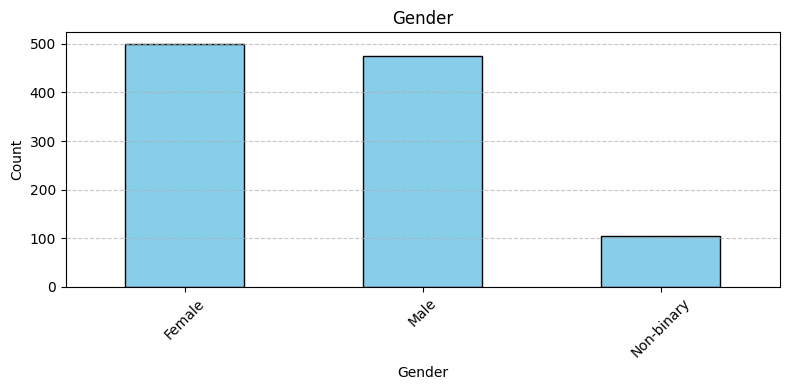

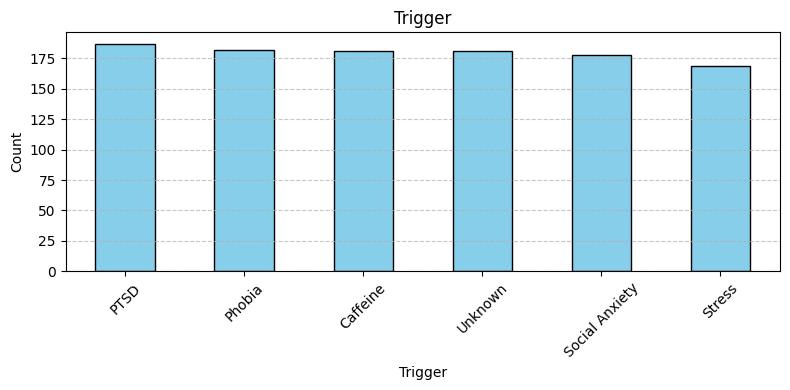

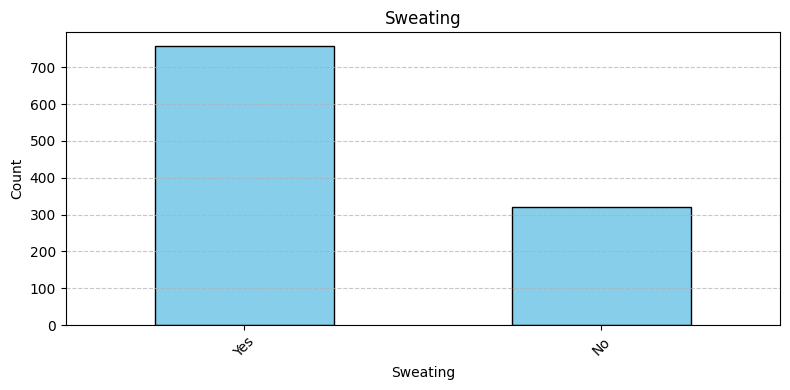

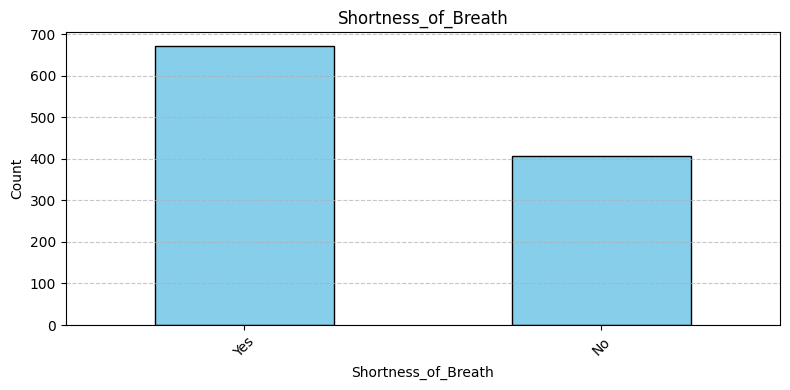

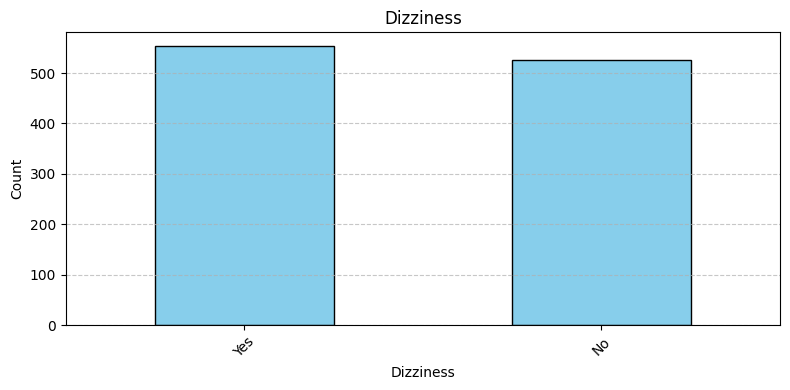

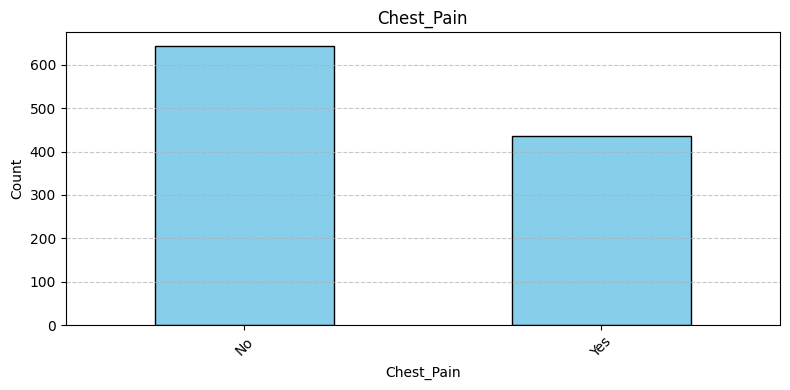

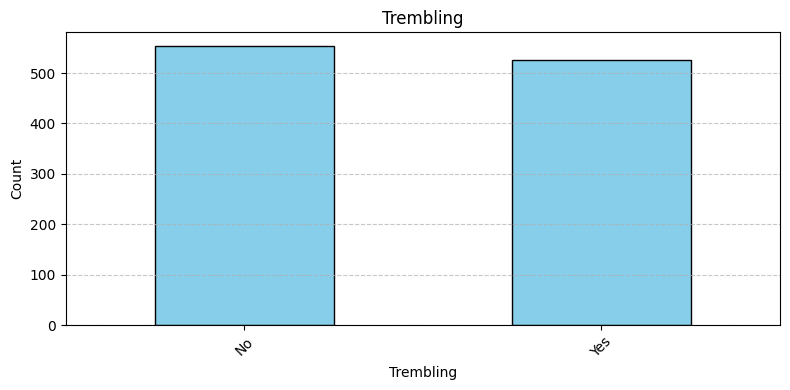

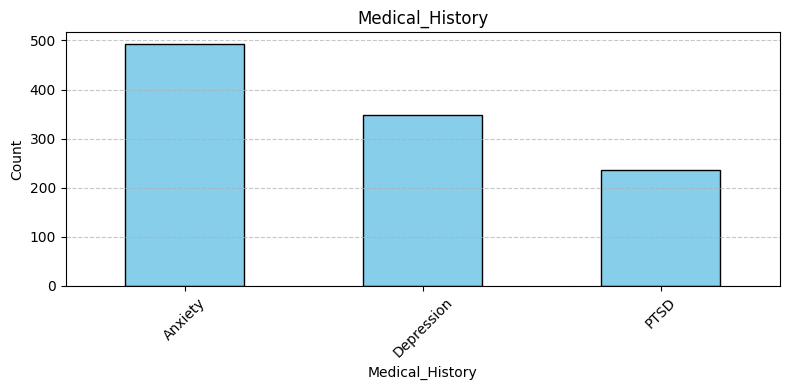

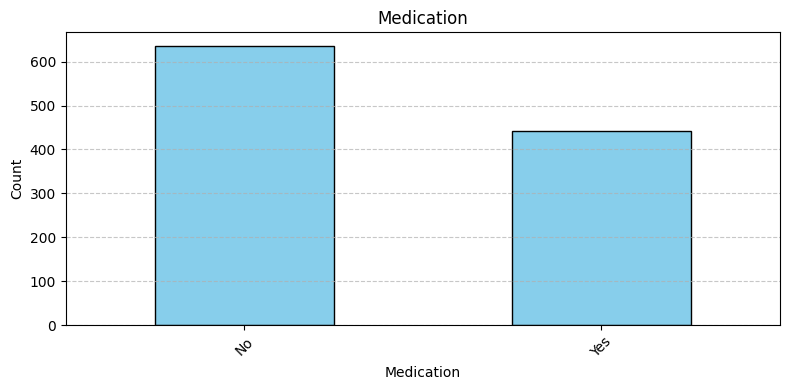

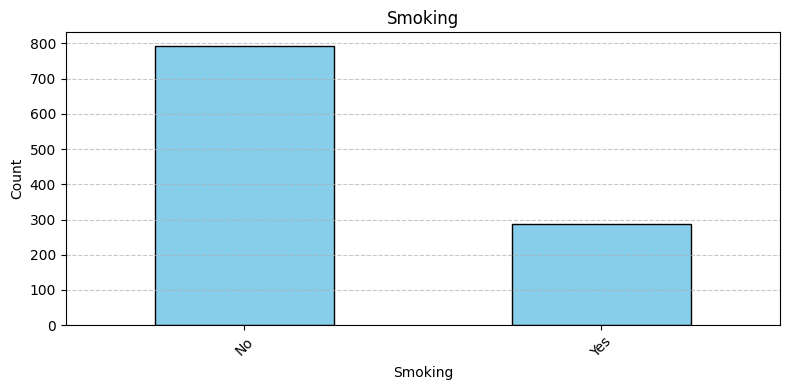

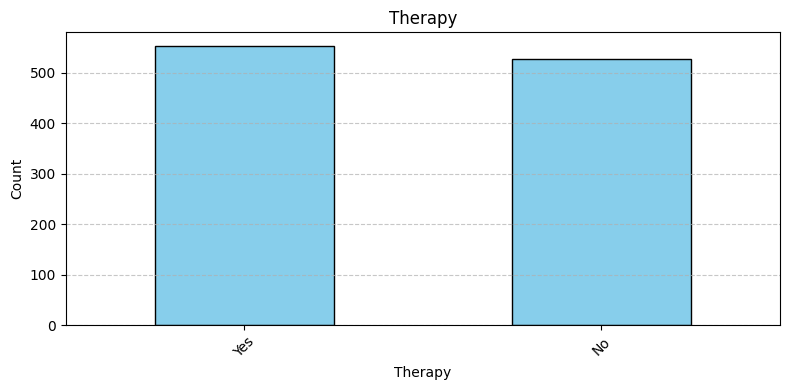

In [11]:
# Plot univariate analysis for each categorical feature
for feature in cat_features:
    plt.figure(figsize=(8, 4))
    df[feature].value_counts().plot(kind='bar', title=f'{feature}', color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

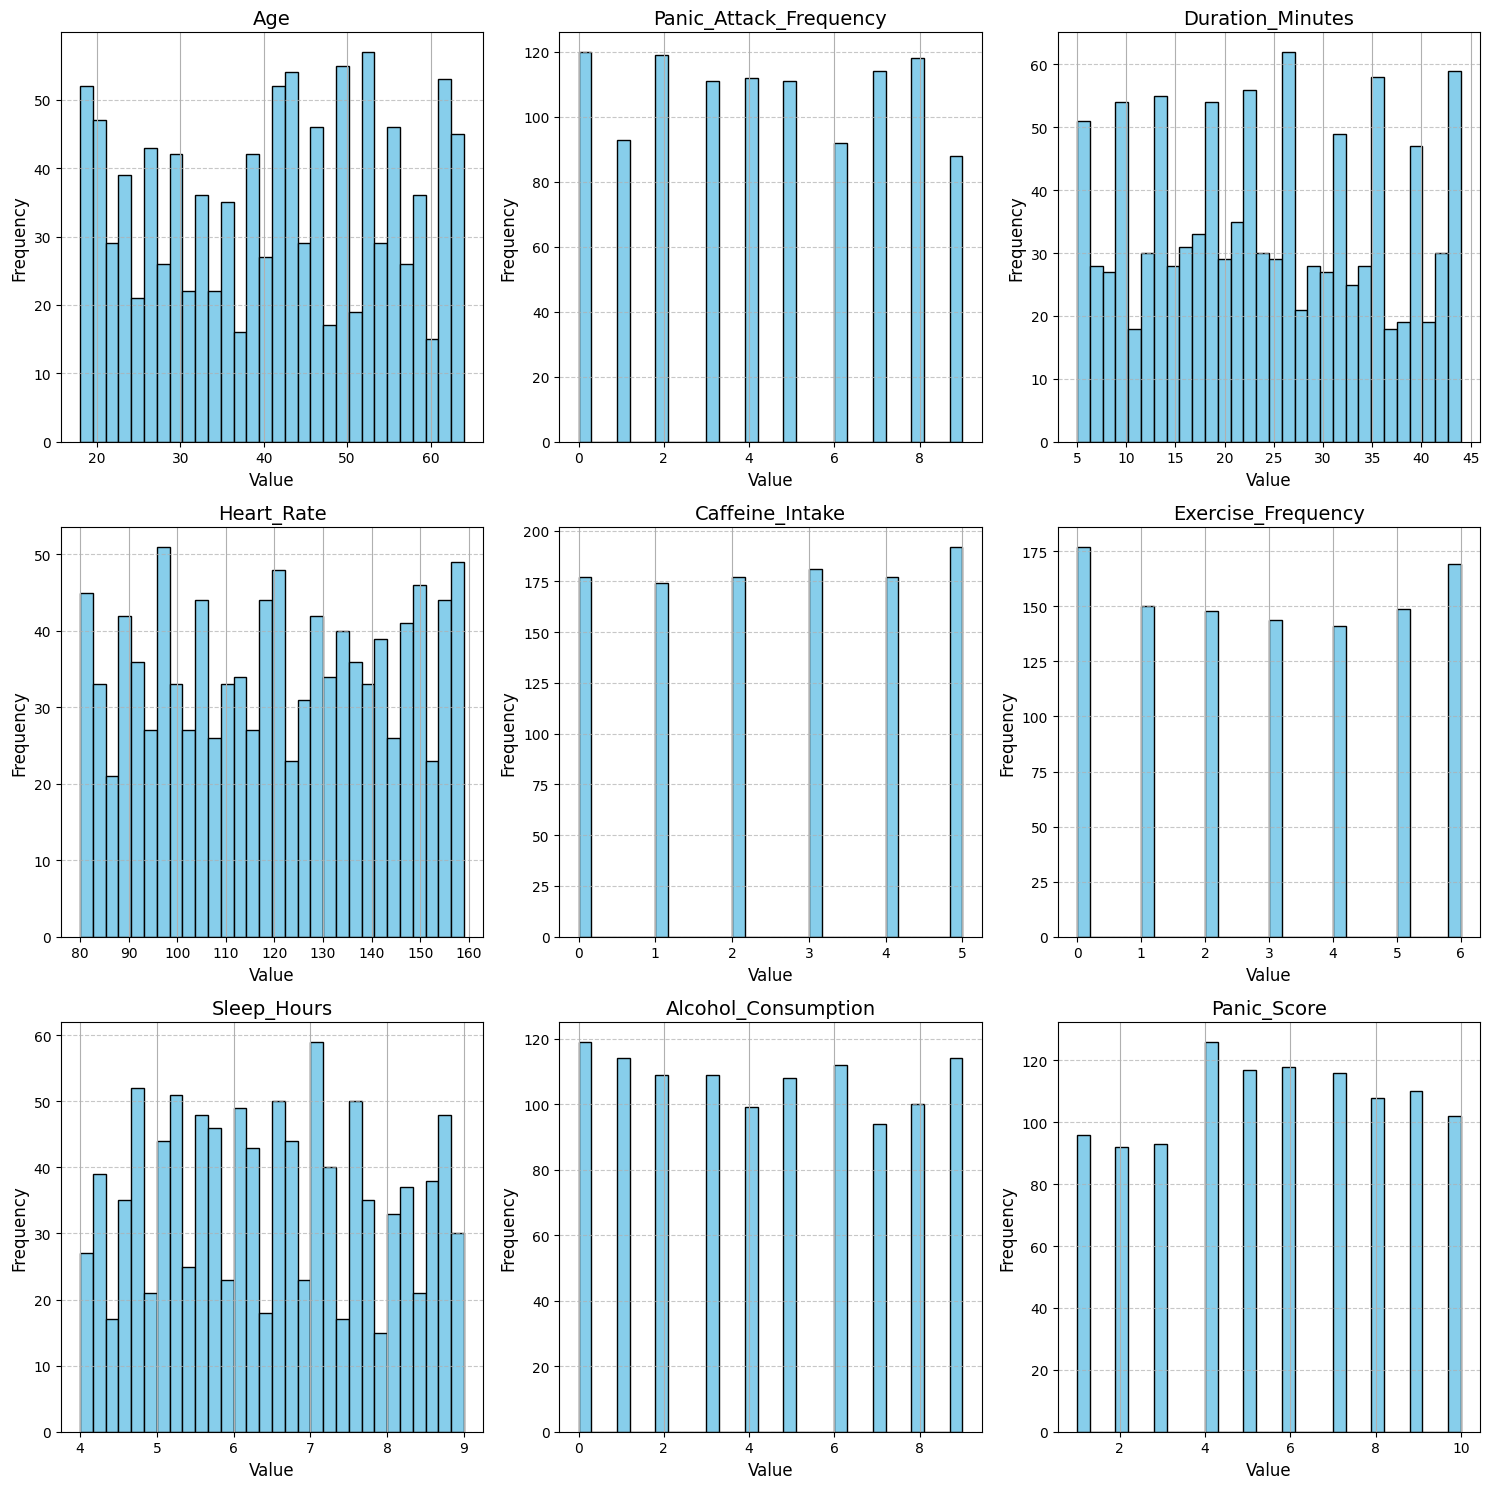

In [12]:
# Plot univariate analysis for numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    ax = axes[i]
    df[feature].hist(bins=30, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(feature, fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hapus subplot kosong jika jumlah fitur tidak genap
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

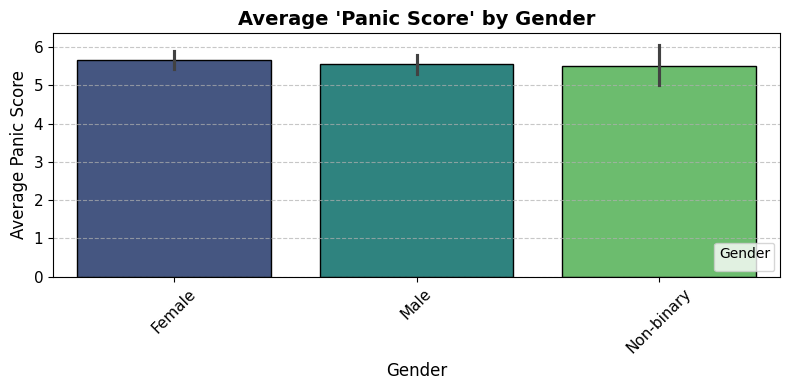

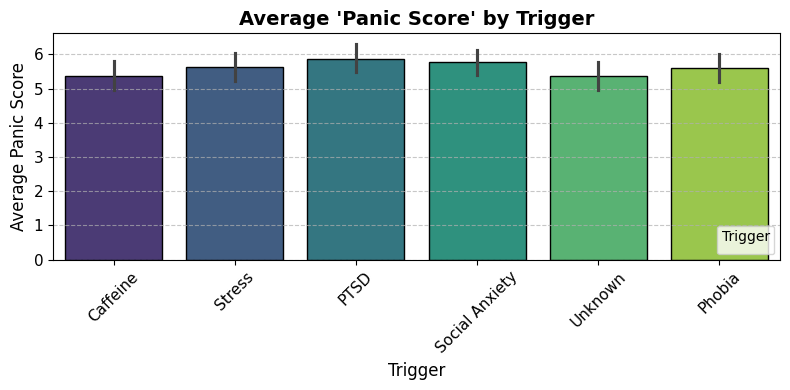

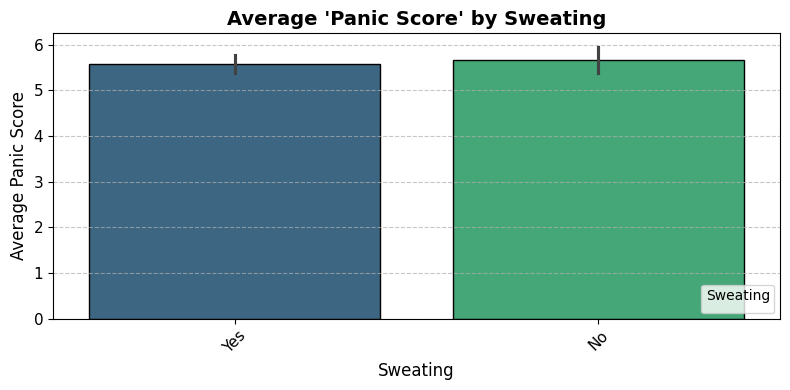

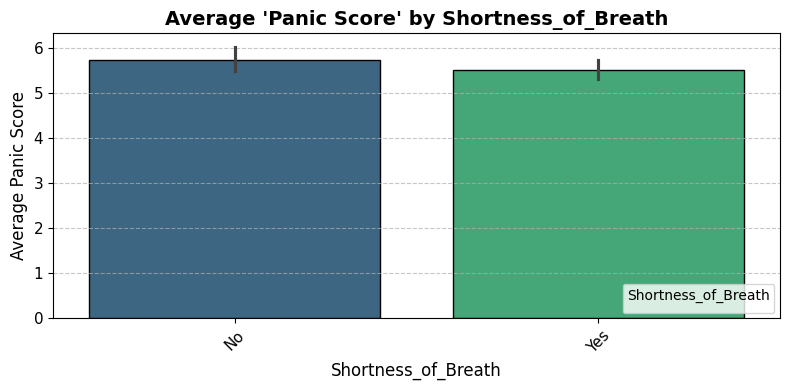

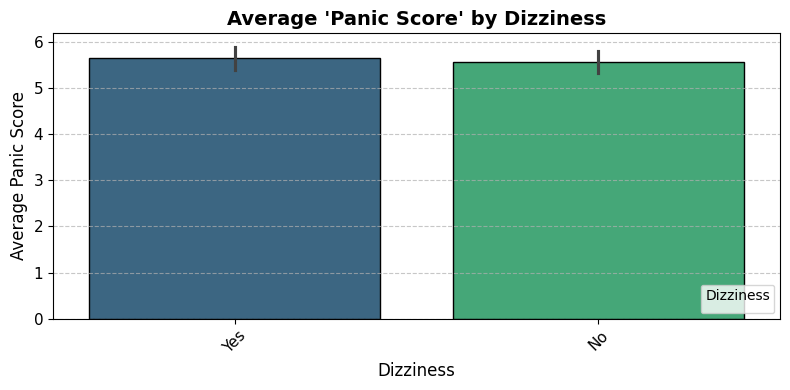

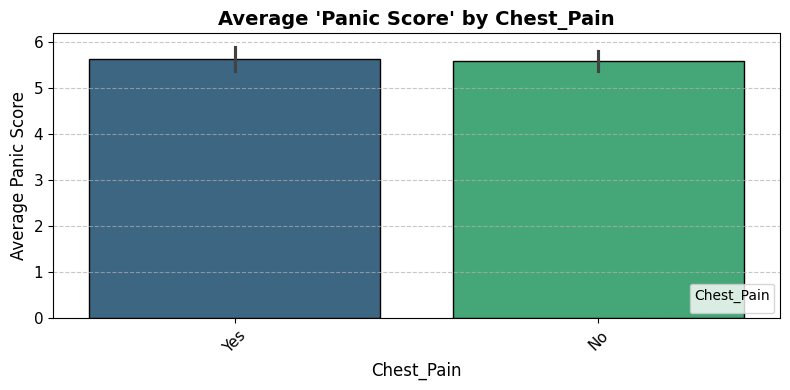

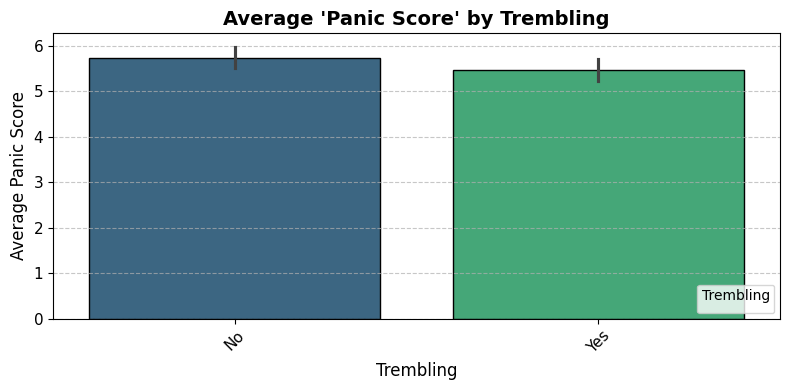

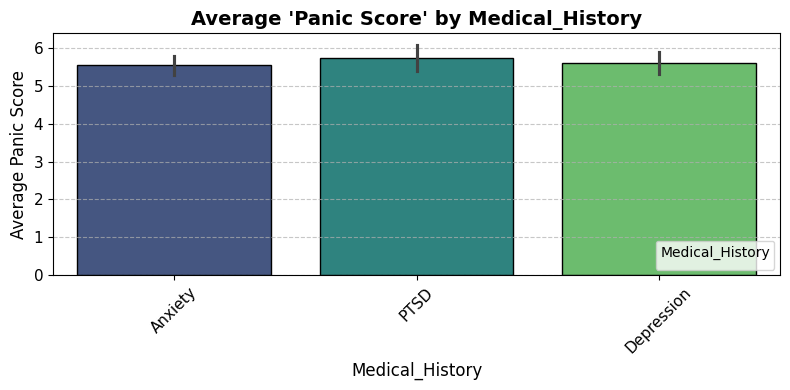

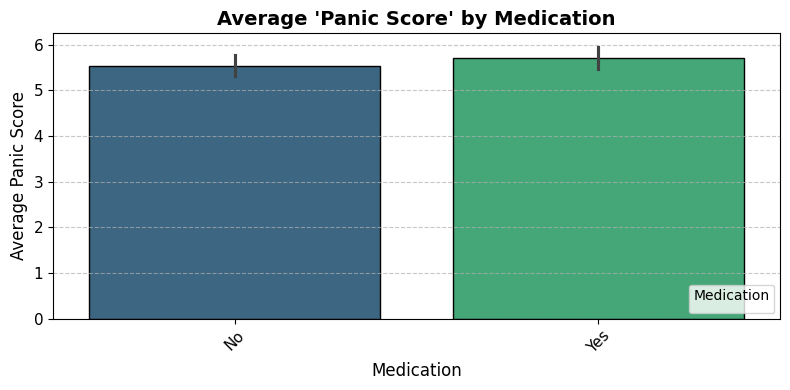

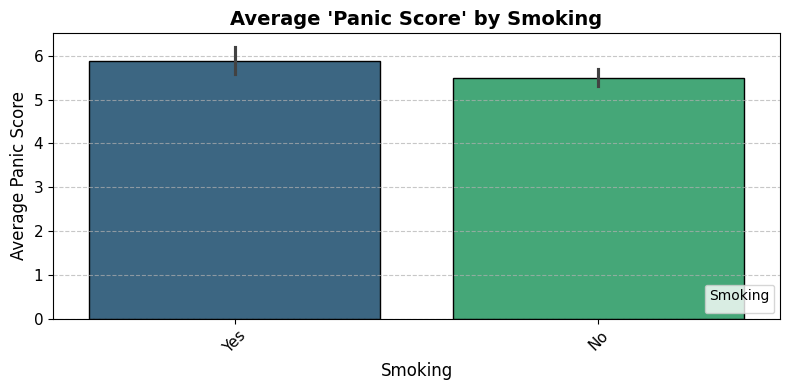

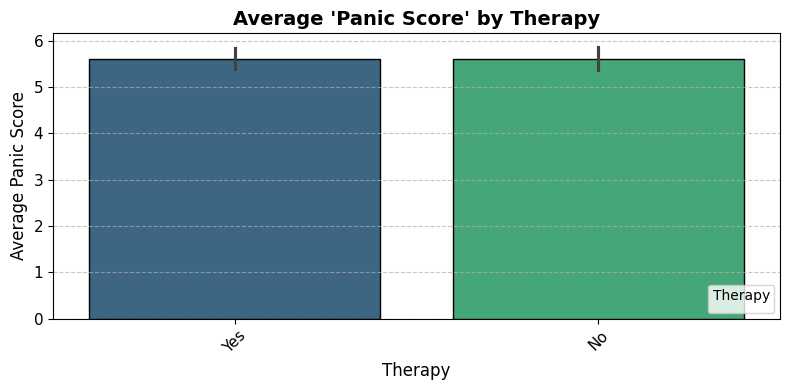

In [13]:
# Multivariate analysis
for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=feature, y="Panic_Score", hue=feature, dodge=False,
        palette="viridis", edgecolor="black", data=df
    )
    plt.title(f"Average 'Panic Score' by {feature}", fontsize=14, fontweight="bold")
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Average Panic Score", fontsize=12)
    plt.xticks(rotation=45, fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(title=feature, fontsize=8, loc="lower right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

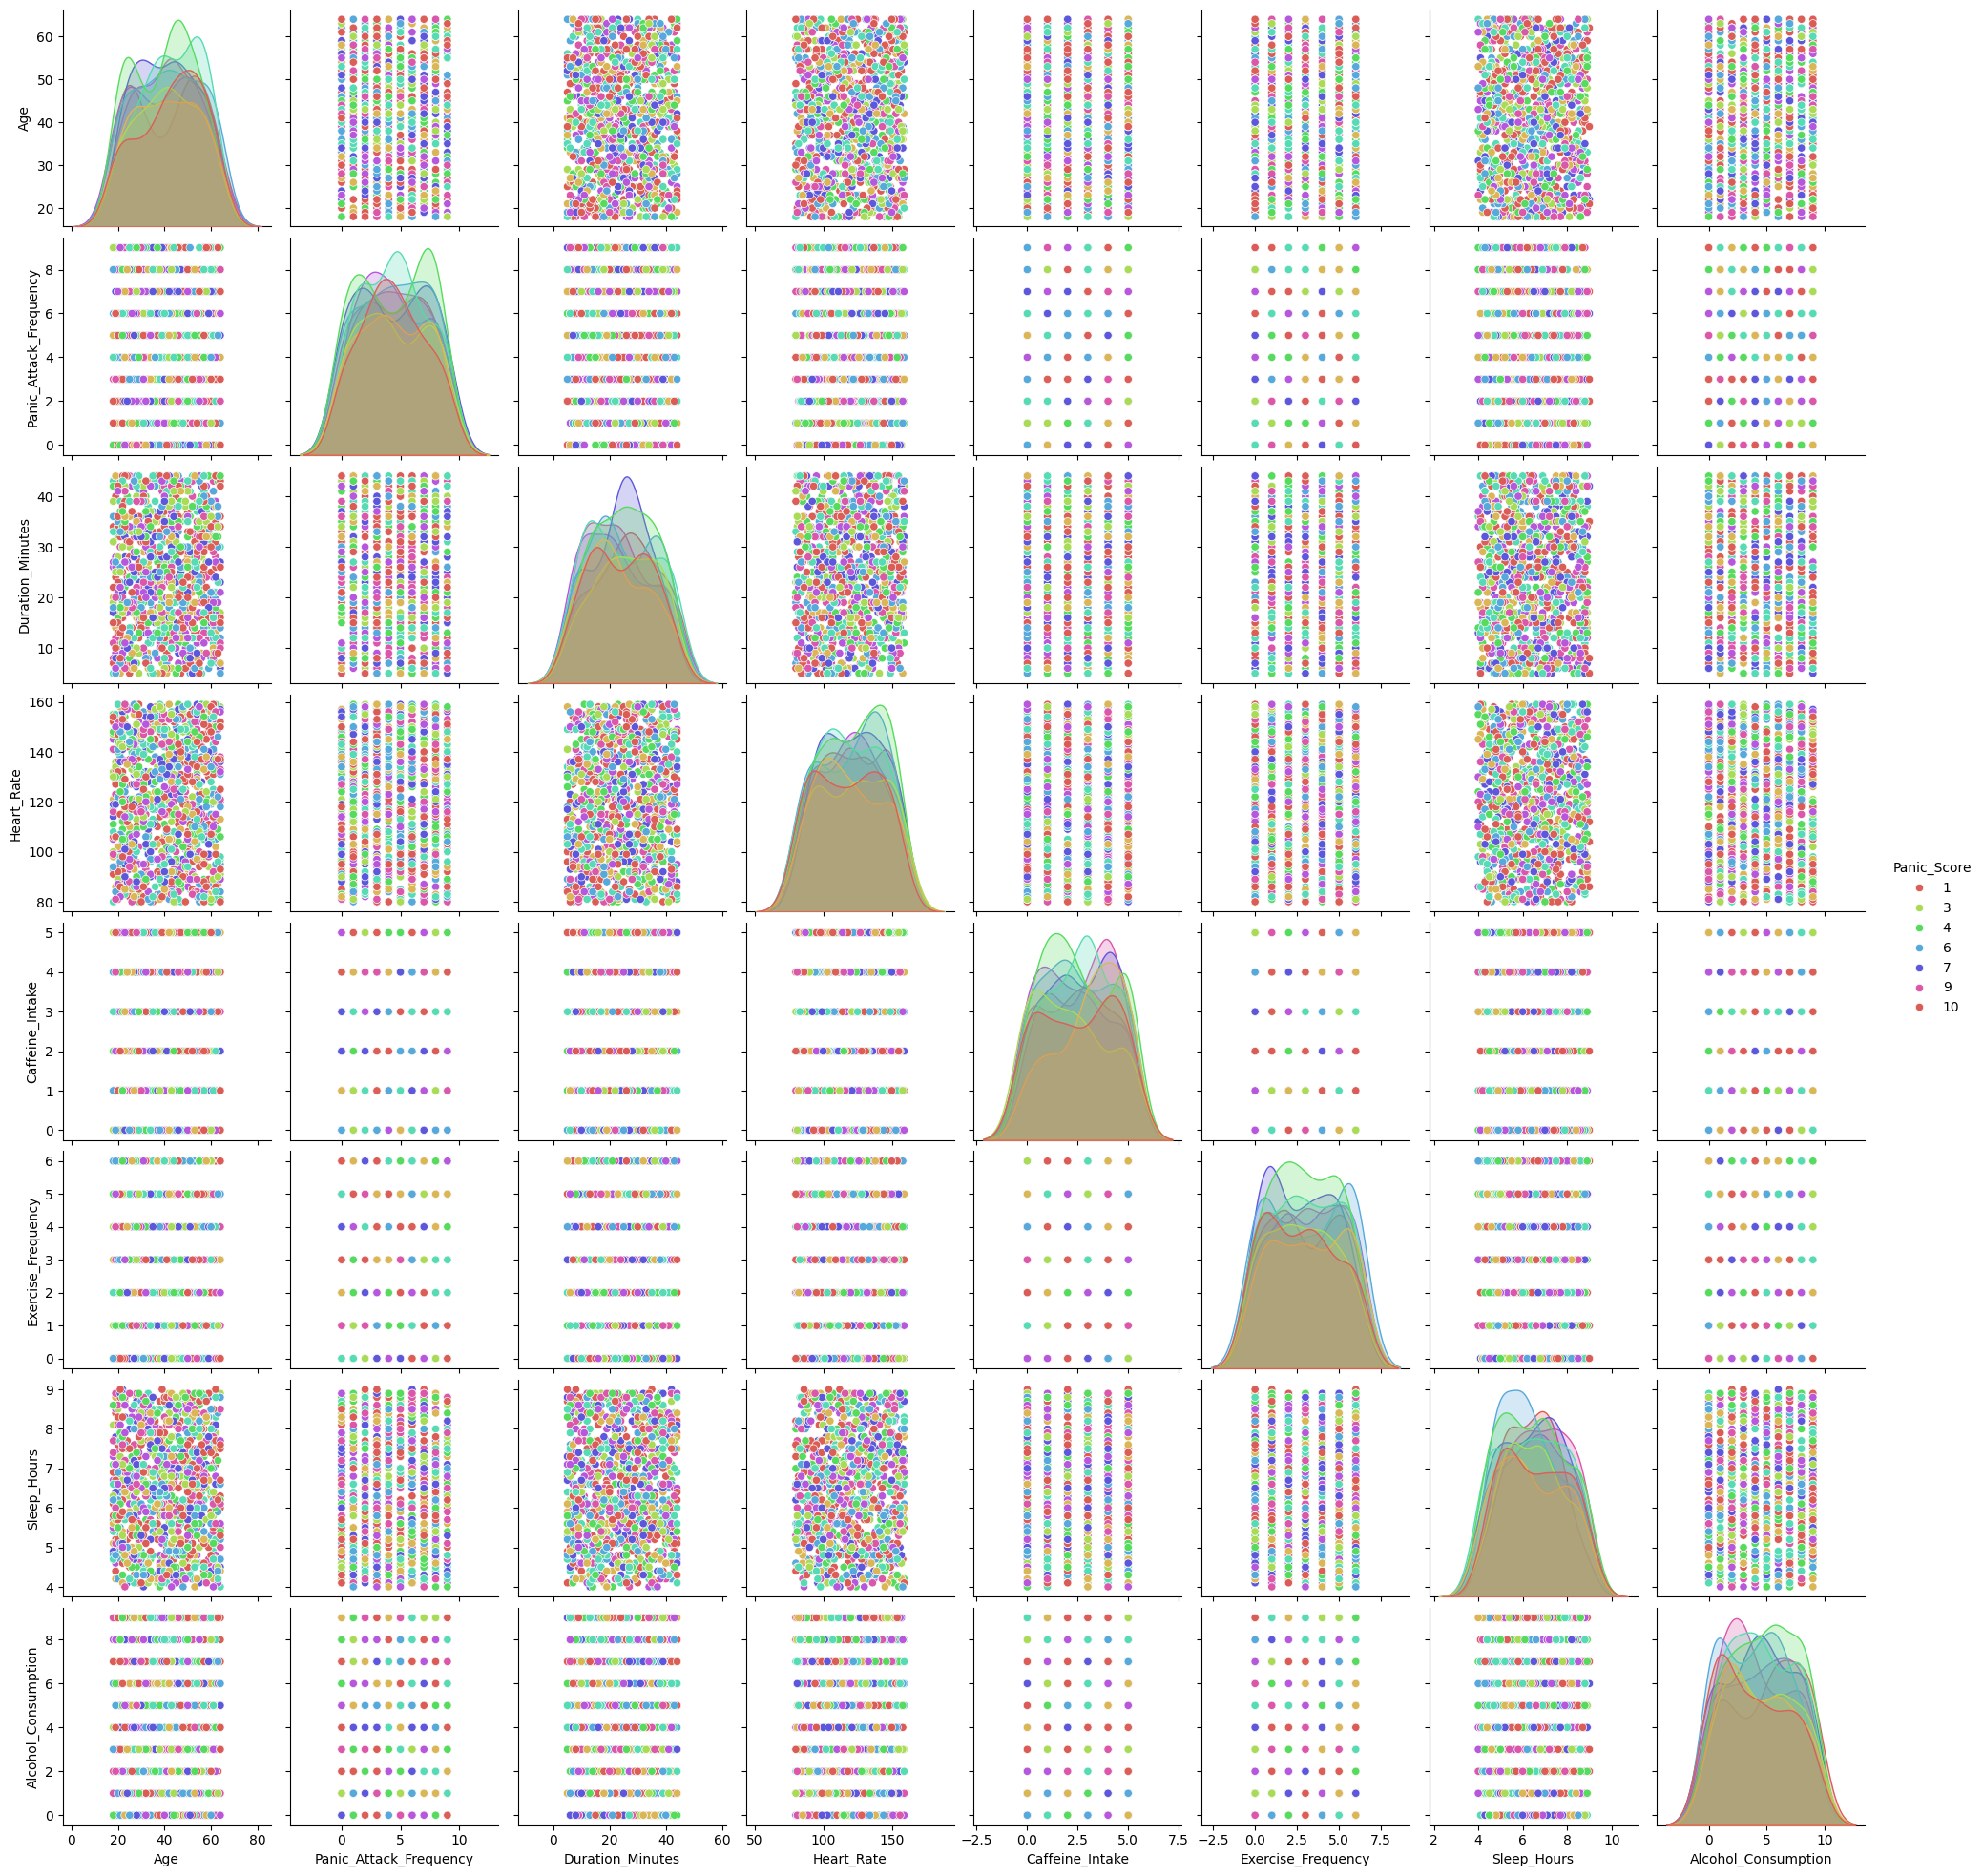

In [14]:
sns.pairplot(df, diag_kind='kde', palette='hls', hue='Panic_Score')
plt.show()

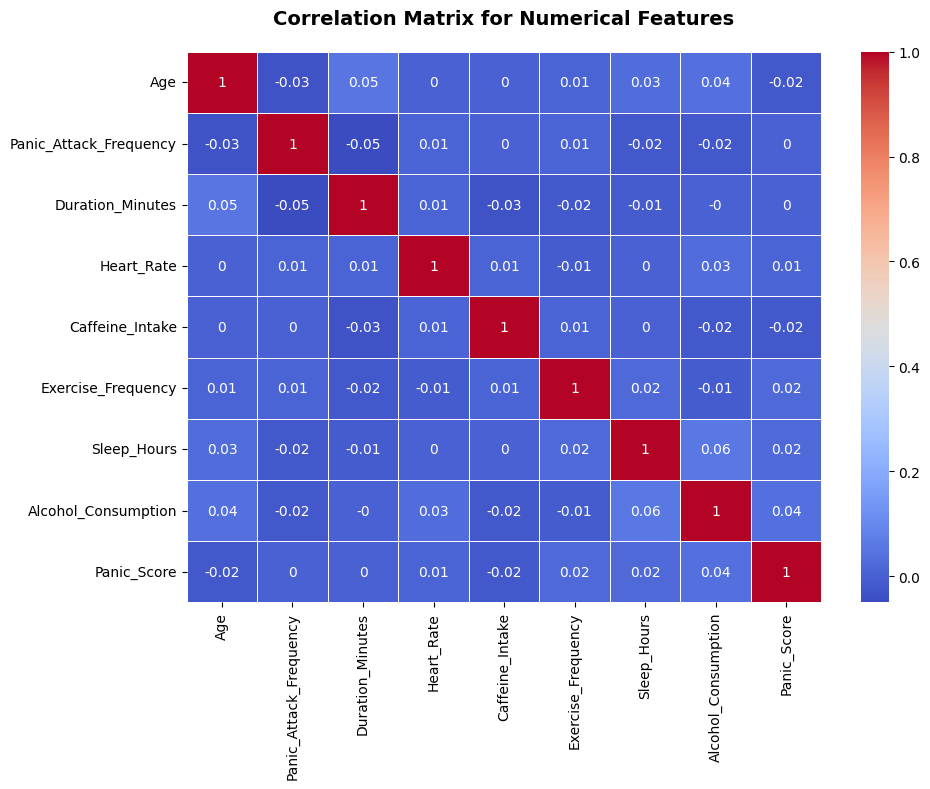

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix for Numerical Features", fontsize=14, fontweight='bold', pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

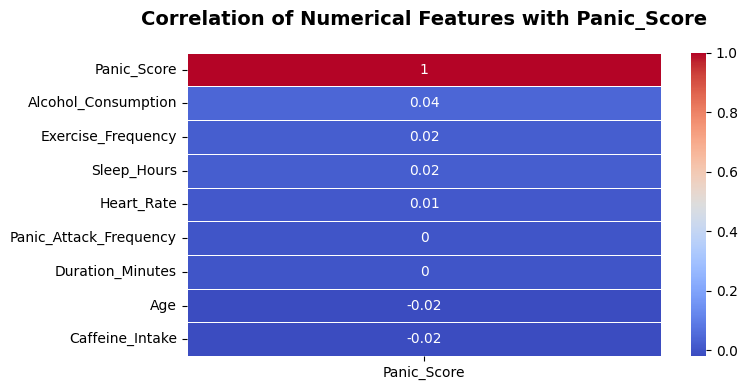

In [16]:
# Filtering 'Panic_Score' with Numerical Features
panic_score_corr = correlation_matrix[["Panic_Score"]].sort_values(by="Panic_Score", ascending=False)

plt.figure(figsize=(8, 4))
sns.heatmap(data=panic_score_corr, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation of Numerical Features with Panic_Score", fontsize=14, fontweight='bold', pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

# **preprosesing data**

In [17]:
encoded_df = df.copy()

label_encoder = LabelEncoder()

for feature in cat_features:
    encoded_df[feature] = label_encoder.fit_transform(encoded_df[feature])
    print(f'Encoded {feature} with labels: ', dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

encoded_df.head()

Encoded Gender with labels:  {'Female': 0, 'Male': 1, 'Non-binary': 2}
Encoded Trigger with labels:  {'Caffeine': 0, 'PTSD': 1, 'Phobia': 2, 'Social Anxiety': 3, 'Stress': 4, 'Unknown': 5}
Encoded Sweating with labels:  {'No': 0, 'Yes': 1}
Encoded Shortness_of_Breath with labels:  {'No': 0, 'Yes': 1}
Encoded Dizziness with labels:  {'No': 0, 'Yes': 1}
Encoded Chest_Pain with labels:  {'No': 0, 'Yes': 1}
Encoded Trembling with labels:  {'No': 0, 'Yes': 1}
Encoded Medical_History with labels:  {'Anxiety': 0, 'Depression': 1, 'PTSD': 2}
Encoded Medication with labels:  {'No': 0, 'Yes': 1}
Encoded Smoking with labels:  {'No': 0, 'Yes': 1}
Encoded Therapy with labels:  {'No': 0, 'Yes': 1}


Age  Gender  Panic_Attack_Frequency  Duration_Minutes  Trigger  Heart_Rate  \
0   56       0                       9                 5        0         134   
1   46       1                       8                 9        4         139   
2   32       0                       6                31        1         141   
3   60       1                       5                20        0         109   
4   25       2                       6                10        0         101   

   Sweating  Shortness_of_Breath  Dizziness  Chest_Pain  Trembling  \
0         1                    0          1           1          0   
1         1                    1          0           0          0   
2         0                    1          1           0          0   
3         1                    1          0           0          1   
4         1                    0          1           1          1   

   Medical_History  Medication  Caffeine_Intake  Exercise_Frequency  \
0                0           0                2                   3   
1                2           1                2                   5   
2                1           0                4                   0   
3                1           0                3                   3   
4                1           0                3                   6   

   Sleep_Hours  Alcohol_Consumption  Smoking  Therapy  Panic_Score  
0          6.4                    5        1        1            5  
1          5.0                    3        0        1            7  
2          8.3                    8        0        1            7  
3          5.3                    8        0        0            1  
4          7.2                    2        0        0            5

In [18]:
dataset = encoded_df.copy()

scaler = StandardScaler()

num_columns_to_scale = [col for col in num_features if col != 'Panic_Score']
dataset[num_columns_to_scale] = scaler.fit_transform(dataset[num_columns_to_scale])

dataset.head()

Age  Gender  Panic_Attack_Frequency  Duration_Minutes  Trigger  \
0  1.084775       0                1.610796         -1.690485        0   
1  0.351479       1                1.259930         -1.338477        4   
2 -0.675136       0                0.558197          0.597564        1   
3  1.378093       1                0.207330         -0.370457        0   
4 -1.188443       2                0.558197         -1.250476        0   

   Heart_Rate  Sweating  Shortness_of_Breath  Dizziness  Chest_Pain  \
0    0.589881         1                    0          1           1   
1    0.804390         1                    1          0           0   
2    0.890194         0                    1          1           0   
3   -0.482666         1                    1          0           0   
4   -0.825881         1                    0          1           1   

   Trembling  Medical_History  Medication  Caffeine_Intake  \
0          0                0           0        -0.314697   
1          0                2           1        -0.314697   
2          0                1           0         0.849089   
3          1                1           0         0.267196   
4          1                1           0         0.267196   

   Exercise_Frequency  Sleep_Hours  Alcohol_Consumption  Smoking  Therapy  \
0            0.014822    -0.049534             0.203481        1        1   
1            0.983224    -1.048945            -0.483067        0        1   
2           -1.437780     1.306810             1.233303        0        1   
3            0.014822    -0.834785             1.233303        0        0   
4            1.467424     0.521559            -0.826342        0        0   

   Panic_Score  
0            5  
1            7  
2            7  
3            1  
4            5

In [19]:
x = dataset.drop('Panic_Score', axis=1)
y = df['Panic_Score'] -1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **latih model**

In [20]:
ml_models = {
    "XGB": XGBRegressor(objective='reg:squarederror', random_state=42),
}

In [21]:
def evaluate_ml_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mae, mse, r2

In [22]:
results = []

for name, model in ml_models.items():
    mae, mse, r2 = evaluate_ml_model(model, x_train, x_test, y_train, y_test)
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R2" : r2
    })

In [23]:
def evaluate_nn_model(model, x_train, x_test, y_train, y_test):
    history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return history, mae, mse, r2

# **visualisasi dan hasil**

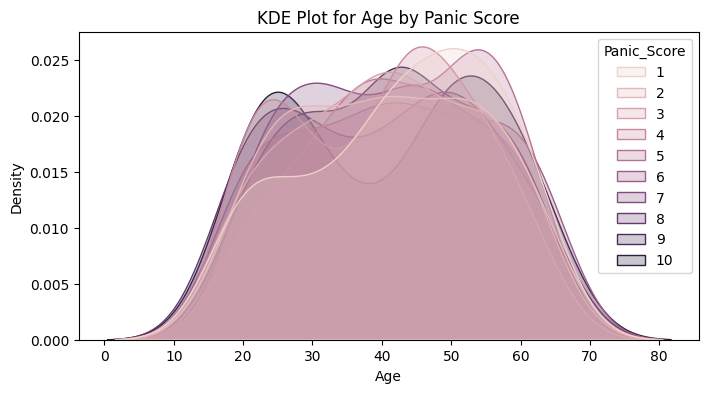

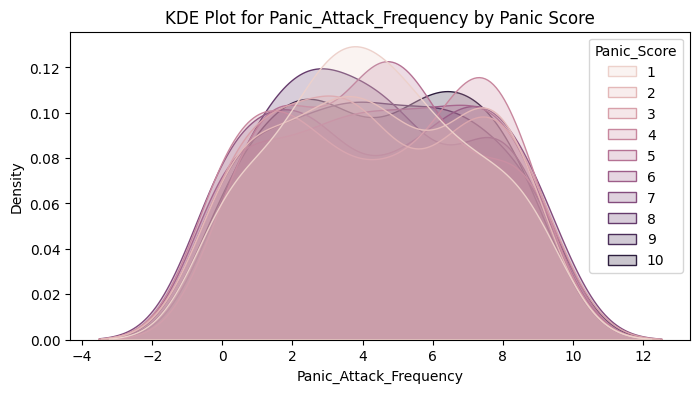

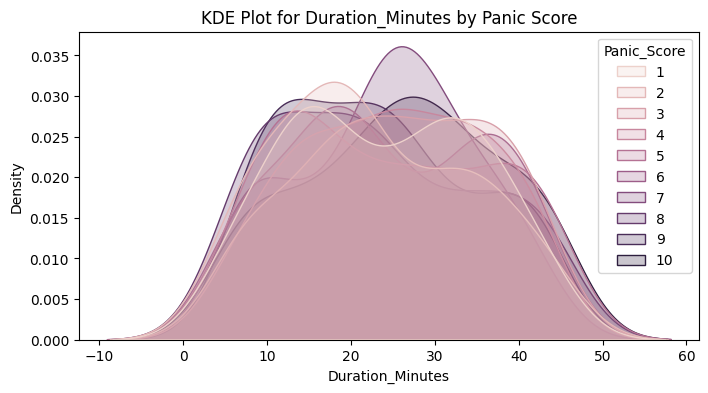

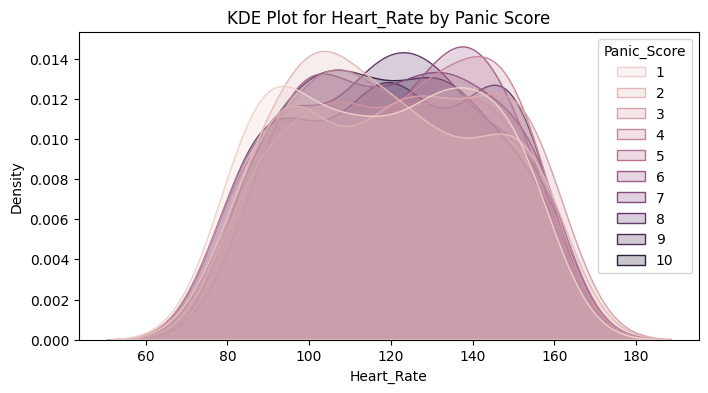

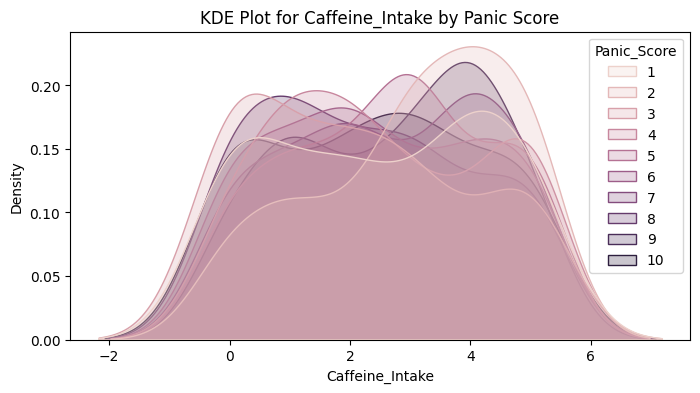

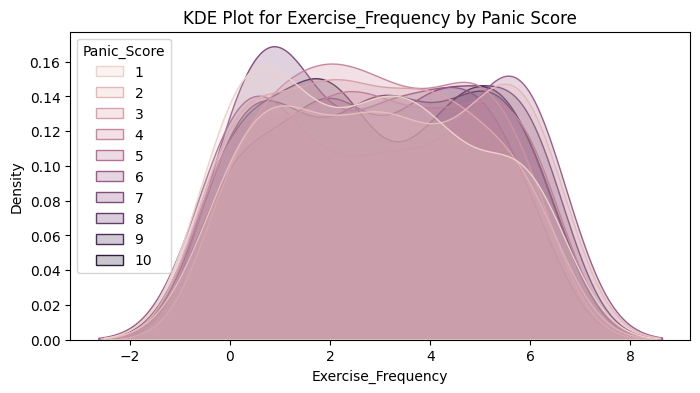

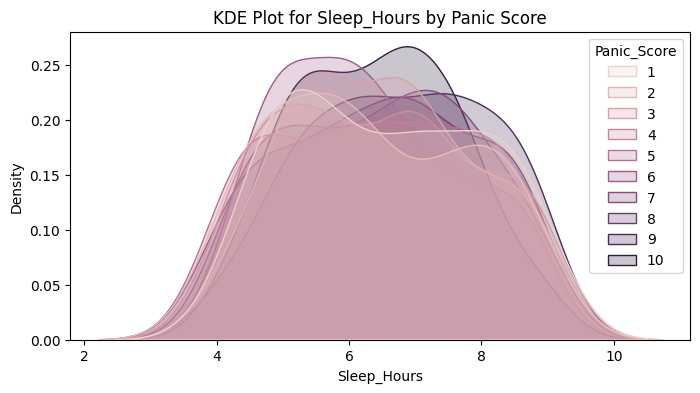

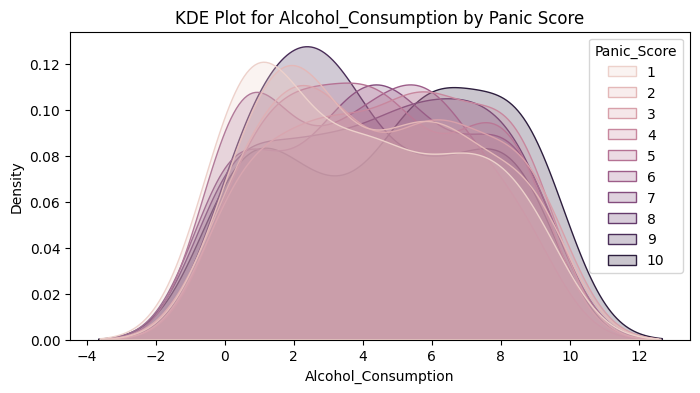

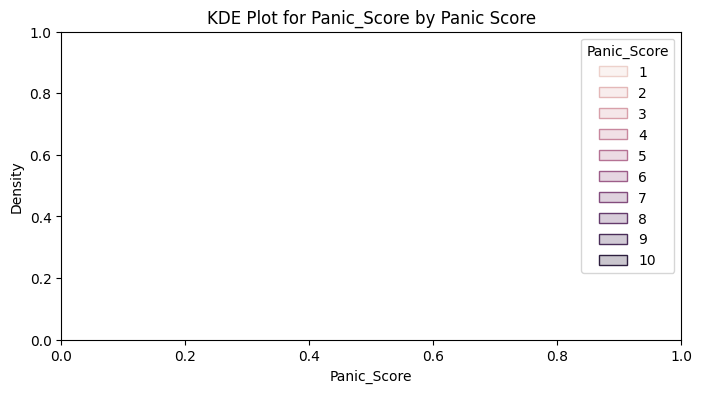

In [30]:
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue='Panic_Score', fill=True, common_norm=False)
    plt.title(f'KDE Plot for {feature} by Panic Score')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

In [27]:
results_df = pd.DataFrame(results)
results_df

Model       MAE       MSE        R2
0   XGB  2.651274  9.915961 -0.324888